<a href="https://colab.research.google.com/github/manjimams-2000/Manjimams2000/blob/main/Logisticregression_classification_SocialNetworkAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [ ]:
df.drop(['User ID'],inplace=True,axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,Gender,Age,EstimatedSalary,Purchased
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [ ]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
y = df['Purchased']
x = df.drop(['Purchased'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
ln_model = LogisticRegression()
ln_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = ln_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[50  2]
 [ 7 21]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.8875


In [ ]:
print(f1_score(y_test,y_pred))

0.8235294117647057


In [ ]:
print(recall_score(y_test,y_pred))

0.75


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
metric_k =[]
neighbors = np.arange(1,25)
for k in neighbors:
  knn_model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred = knn_model.predict(x_test)
  knn_acc = accuracy_score(y_test,y_pred)
  metric_k.append(knn_acc)

In [ ]:
metric_k

[0.8875,
 0.8375,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625]

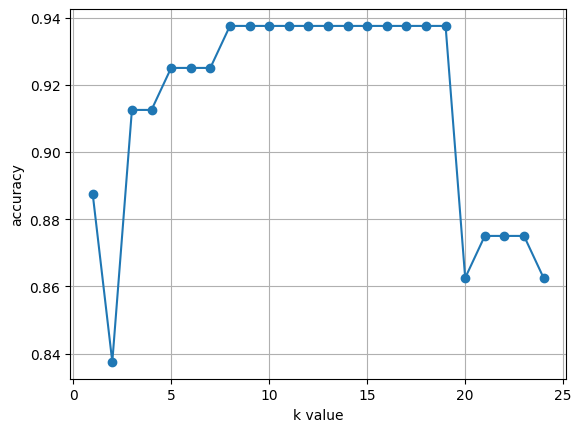

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=11,metric='minkowski')
knn_class.fit(x_train,y_train)
knn_pred = knn_class.predict(x_test)
print(confusion_matrix(y_test,knn_pred))
print("Accuracy : ",accuracy_score(y_test,knn_pred))
print("F1 score : ",f1_score(y_test,knn_pred))
print("Recall : ",recall_score(y_test,knn_pred))

[[49  3]
 [ 2 26]]
Accuracy :  0.9375
F1 score :  0.912280701754386
Recall :  0.9285714285714286


In [ ]:
GAUSSIAN NAIVE BAYES


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train,y_train)
naive_pred = naive_model.predict(x_test)
print(confusion_matrix(y_test,naive_pred))
print("Accuracy : ",accuracy_score(y_test,naive_pred))
print("F1 score : ",f1_score(y_test,naive_pred))
print("Recall : ",recall_score(y_test,naive_pred))


[[50  2]
 [ 3 25]]
Accuracy :  0.9375
F1 score :  0.9090909090909091
Recall :  0.8928571428571429


Titanic Dataset


In [ ]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.shape

(891, 15)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
data.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
data.adult_male.unique()

array([ True, False])

In [ ]:
data.adult_male.value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [ ]:
data.alone.unique()

array([False,  True])

In [ ]:
data.parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
#removing the unwanted columns
data.drop(columns=["deck","alive",'adult_male'],inplace=True)
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
embark_town      2
alone            0
dtype: int64

In [ ]:
data['embarked'].mode()

0    S
Name: embarked, dtype: object

In [ ]:
data['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [ ]:
data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)
data['embark_town'].fillna(data['embarked'].mode()[0],inplace=True)
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
embark_town      0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

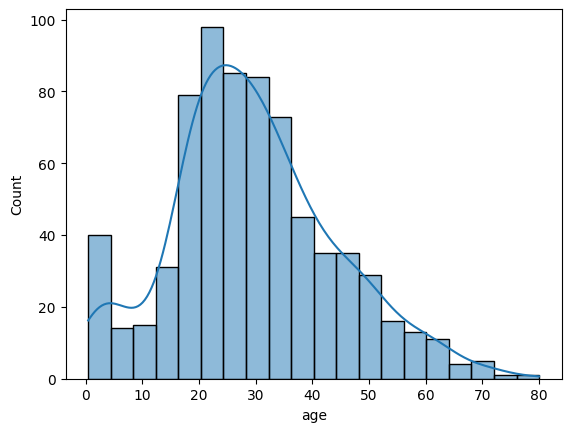

In [ ]:
sns.histplot(data['age'],kde=True)

In [ ]:
data['age'].fillna(data['age'].mean(),inplace=True)
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
embark_town    0
alone          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  embark_town  891 non-null    object  
 11  alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(4)
memory usage: 71.6+ KB


In [ ]:
data.nunique()

survived         2
pclass           3
sex              2
age             89
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
embark_town      4
alone            2
dtype: int64

In [ ]:
columns_to_fill = ['age','fare']